# Plots of round-trip times

## Load libraries

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## ASN to ASN

In [2]:
asnMatrix <- fread("asn_rtt_stat.csv.gz")
asns <- asnMatrix[, factor(unique(c(`asn1`,`asn2`)))]
asnMatrix[, `asn1`:=factor(`asn1`,levels=asns)]
asnMatrix[, `asn2`:=factor(`asn2`,levels=asns)]
colnames(asnMatrix) <- c("ASN 1", "ASN 2", "Count", "Mean", "Standard Deviation", "Minimum", "Maximum")
asnMatrix %>% summary

     ASN 1            ASN 2            Count               Mean          
 0      :  3151   397207 :  1860   Min.   :       1   Min.   :     0.03  
 3333   :  2233   394353 :  1842   1st Qu.:       6   1st Qu.:    30.22  
 1221   :  2141   396654 :  1840   Median :    2169   Median :    95.40  
 10886  :  1993   139341 :  1379   Mean   :    6231   Mean   :   114.11  
 1508   :  1827   209242 :  1229   3rd Qu.:    4326   3rd Qu.:   173.23  
 2149   :  1806   54113  :  1217   Max.   :44991955   Max.   :301077.44  
 (Other):409221   (Other):413005                                         
 Standard Deviation     Minimum             Maximum       
 Min.   :     0.00   Min.   :     0.00   Min.   :      0  
 1st Qu.:     0.82   1st Qu.:    22.19   1st Qu.:     56  
 Median :     3.64   Median :    75.87   Median :    154  
 Mean   :    17.62   Mean   :   101.80   Mean   :    424  
 3rd Qu.:    13.39   3rd Qu.:   161.65   3rd Qu.:    287  
 Max.   :173798.40   Max.   :301077.44   Max.   :35923

In [3]:
asn <- melt(asnMatrix, id.vars=c("ASN 1", "ASN 2"), variable.name="Statistic", value.name="Value", measure.vars=c("Mean","Standard Deviation","Minimum", "Maximum"))

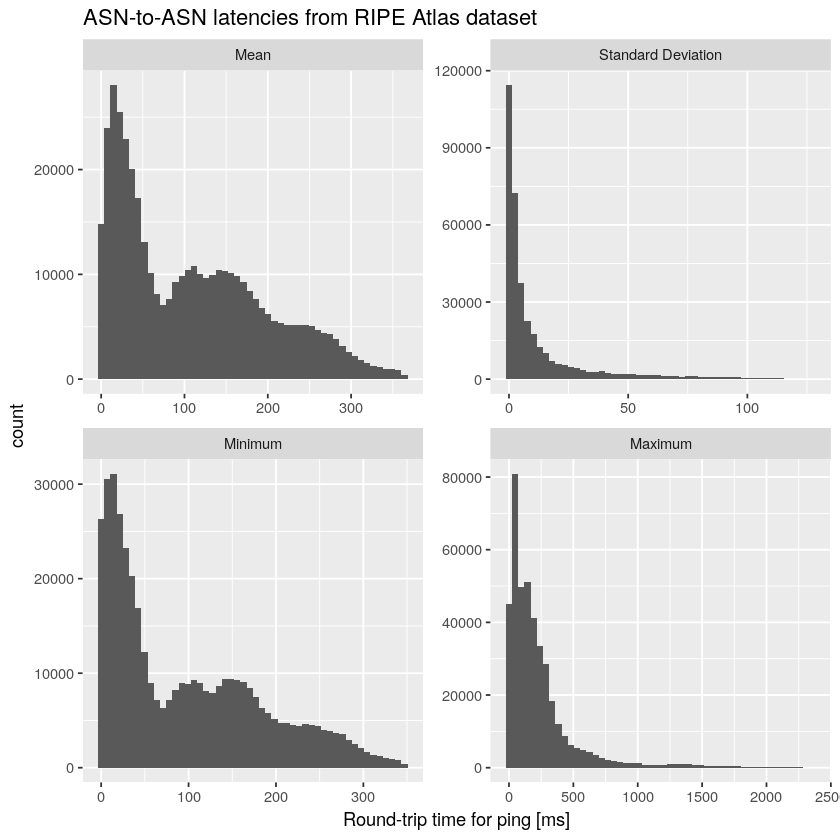

In [4]:
ggplot(asn[
    `Statistic` == "Mean" & `Value` < asn[`Statistic`=="Mean",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Standard Deviation" & `Value` < asn[`Statistic`=="Standard Deviation",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Minimum" & `Value` < asn[`Statistic`=="Minimum",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Maximum" & `Value` < asn[`Statistic`=="Maximum",quantile(`Value`, 0.99, na.rm=TRUE)]
], aes(x=`Value`)) +
    geom_histogram(bins=50, na.rm=TRUE) +
    xlab("Round-trip time for ping [ms]") +
    facet_wrap(. ~ `Statistic`, scales="free") +
    ggtitle("ASN-to-ASN latencies from RIPE Atlas dataset")

In [5]:
ggsave("asn-to-asn.svg", units="in", dpi=150, width=8, height=6)

In [6]:
ggsave("asn-to-asn.png", units="in", dpi=150, width=8, height=6)

## Country to country

In [7]:
countryMatrix <- fread("country_rtt_stat.csv.gz")
countries <- countryMatrix[, factor(unique(c(`cty1`,`cty2`)))]
countryMatrix[, `cty1`:=factor(`cty1`,levels=countries)]
countryMatrix[, `cty2`:=factor(`cty2`,levels=countries)]
colnames(countryMatrix) <- c("Country 1", "Country 2", "Count", "Mean", "Standard Deviation", "Minimum", "Maximum")
countryMatrix %>% summary

   Country 1      Country 2        Count                Mean          
 AT     : 134   US     : 145   Min.   :        1   Min.   :   0.1315  
 AU     : 130   VN     : 120   1st Qu.:     4258   1st Qu.:  98.0432  
 BR     : 119   ZA     : 118   Median :    18759   Median : 176.9048  
 BG     : 115   UY     : 115   Mean   :   385491   Mean   : 179.1625  
 CA     : 114   UA     : 113   3rd Qu.:    89268   3rd Qu.: 248.2103  
 (Other):6206   (Other):6204   Max.   :442308114   Max.   :1531.4980  
 NA's   :   9   NA's   :  12                                          
 Standard Deviation    Minimum           Maximum       
 Min.   :   0.028   Min.   :   0.00   Min.   :      0  
 1st Qu.:   9.609   1st Qu.:  25.17   1st Qu.:    285  
 Median :  26.345   Median : 109.86   Median :    603  
 Mean   :  43.461   Mean   : 122.27   Mean   :   5333  
 3rd Qu.:  56.788   3rd Qu.: 192.67   3rd Qu.:   1392  
 Max.   :4392.409   Max.   :1384.45   Max.   :3592381  
 NA's   :187                            

In [8]:
country <- melt(countryMatrix, id.vars=c("Country 1", "Country 2"), variable.name="Statistic", value.name="Value", measure.vars=c("Mean","Standard Deviation","Minimum", "Maximum"))

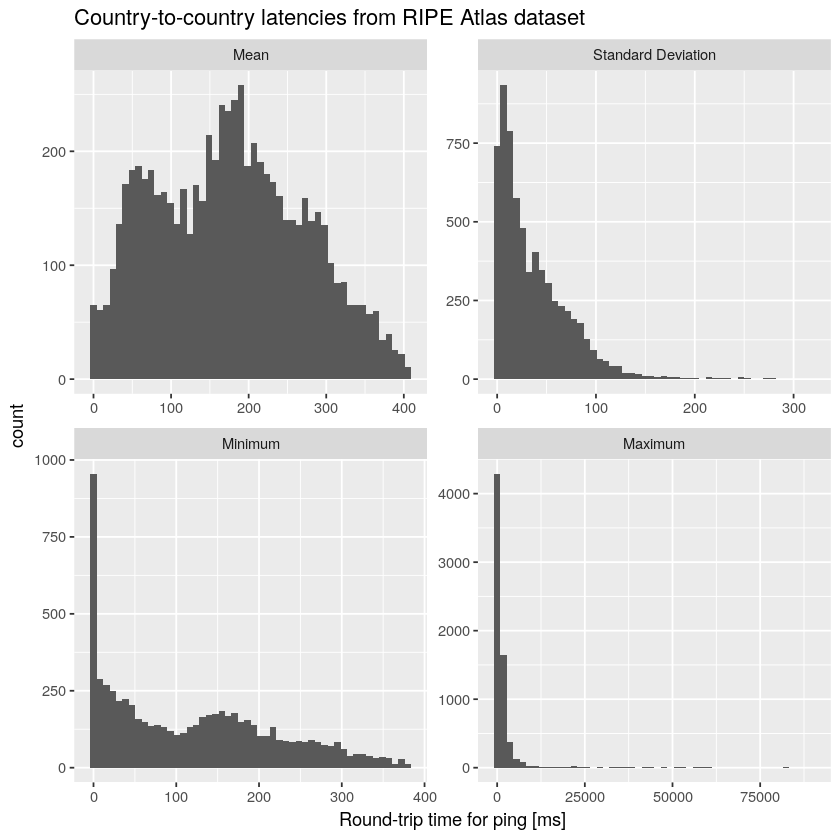

In [9]:
ggplot(country[
    `Statistic` == "Mean" & `Value` < country[`Statistic`=="Mean",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Standard Deviation" & `Value` < country[`Statistic`=="Standard Deviation",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Minimum" & `Value` < country[`Statistic`=="Minimum",quantile(`Value`, 0.99, na.rm=TRUE)] |
    `Statistic` == "Maximum" & `Value` < country[`Statistic`=="Maximum",quantile(`Value`, 0.99, na.rm=TRUE)]
], aes(x=`Value`)) +
    geom_histogram(bins=50, na.rm=TRUE) +
    xlab("Round-trip time for ping [ms]") +
    facet_wrap(. ~ `Statistic`, scales="free") +
    ggtitle("Country-to-country latencies from RIPE Atlas dataset")

In [10]:
ggsave("cty-to-cty.svg", units="in", dpi=150, width=8, height=6)

In [11]:
ggsave("cty-to-cty.png", units="in", dpi=150, width=8, height=6)

## Intra-ASN

In [12]:
intra <- fread("intra_rtt_stat.csv.gz")
intra

rtt_cnt,rtt_avg,rtt_std,rtt_min,rtt_max
<int>,<dbl>,<dbl>,<int>,<dbl>
145057189,80.41246,103.5428,0,249625.7
